In [1]:
import os
import numpy as np
import torch
from PIL import Image
import requests
from transformers import pipeline
from transformers import SamModel, SamProcessor
import matplotlib.pyplot as plt
%matplotlib inline

from util import *

In [2]:
cache_dir = "./cache" # path to the cache directory

# create the cache directory if it doesn't exist
if not os.path.exists(cache_dir):
    os.makedirs(cache_dir)

device = "cuda" if torch.cuda.is_available() else "cpu"
model = SamModel.from_pretrained("facebook/sam-vit-huge", cache_dir=cache_dir).to(device)
processor = SamProcessor.from_pretrained("facebook/sam-vit-huge", cache_dir=cache_dir)

generator = pipeline('text-generation', model=model, tokenizer=processor)

Xformers is not installed correctly. If you want to use memorry_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.
The model 'SamModel' is not supported for text-generation. Supported models are ['BartForCausalLM', 'BertLMHeadModel', 'BertGenerationDecoder', 'BigBirdForCausalLM', 'BigBirdPegasusForCausalLM', 'BioGptForCausalLM', 'BlenderbotForCausalLM', 'BlenderbotSmallForCausalLM', 'BloomForCausalLM', 'CamembertForCausalLM', 'CodeGenForCausalLM', 'CpmAntForCausalLM', 'CTRLLMHeadModel', 'Data2VecTextForCausalLM', 'ElectraForCausalLM', 'ErnieForCausalLM', 'GitForCausalLM', 'GPT2LMHeadModel', 'GPT2LMHeadModel', 'GPTBigCodeForCausalLM', 'GPTNeoForCausalLM', 'GPTNeoXForCausalLM', 'GPTNeoXJapaneseForCausalLM', 'GPTJForCausalLM', 'LlamaForCausalLM', 'MarianForCausalLM', 'MBartForCausalLM', 'MegaForCausalLM', 'MegatronBertForCausalLM', 'MvpForCausalLM', 'OpenLlamaForCausalLM', 'OpenAIGPTLMHeadModel', 'OPTForCausalLM', 'PegasusForCaus

Image size: (1762, 1154)


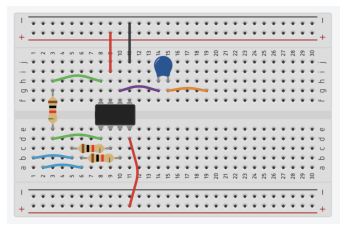

In [3]:
img_path = "images/tinkercad.png"
raw_image = Image.open(img_path).convert("RGB")

# print image size
print("Image size: {}".format(raw_image.size))

# display the image
plt.imshow(raw_image)
plt.axis("off")
plt.show()

inputs = processor(raw_image, return_tensors="pt").to(device)
image_embeddings = model.get_image_embeddings(inputs["pixel_values"])

In [4]:
generator = pipeline("mask-generation", model="facebook/sam-vit-huge")
outputs = generator(raw_image, points_per_batch=64)

AttributeError: 'numpy.ndarray' object has no attribute 'cpu'

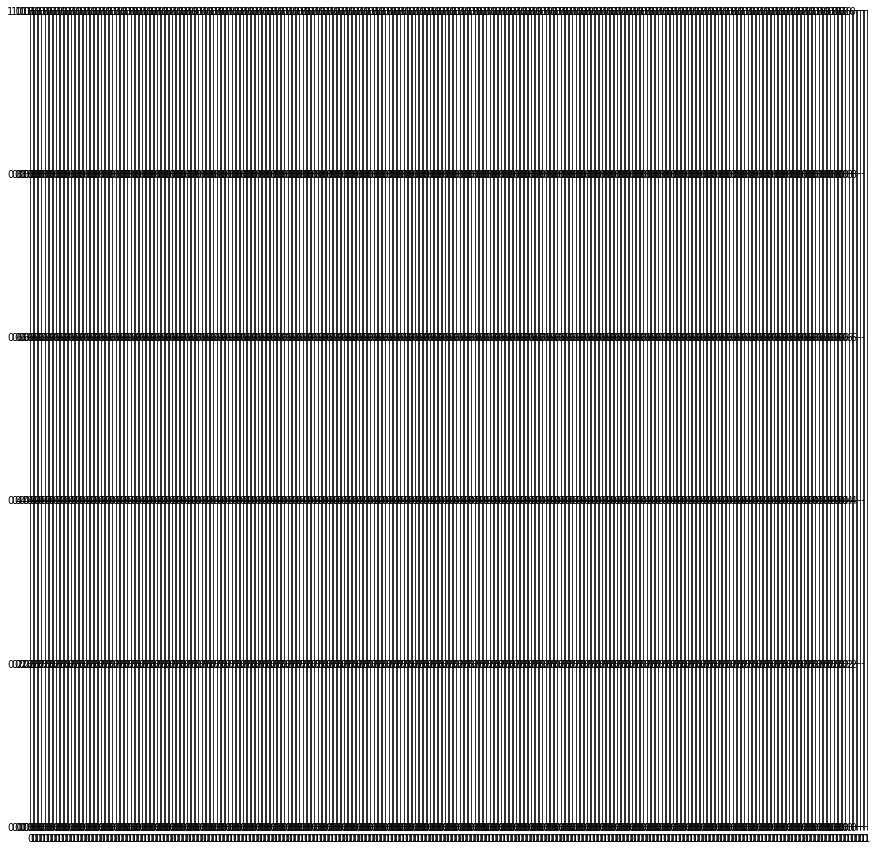

In [36]:
masks = outputs["masks"]
scores = outputs["scores"]

show_masks_on_image(raw_image, masks, scores)

In [13]:
masks = processor.image_processor.post_process_masks(
    outputs.pred_masks.cpu(), inputs["original_sizes"].cpu(), inputs["reshaped_input_sizes"].cpu()
)
scores = outputs.iou_scores

KeyError: 'masks'